# Organics Data Project

In [15]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from patsy import dmatrices
%pylab inline

organic = pd.read_csv("Organics Project Data.csv")
organic.columns = ['gender','region','loyalty_level','tvregion','affluence','age','loyalty_tenure','purchase']

# CLEANING: drop NaN and non-entries, convert necessary variables to intergers. 
organic = organic.dropna()
organic = organic[organic.age != "."]
organic = organic[organic['loyalty_tenure'] != "."]
organic = organic[organic['affluence'] != "."]
organic['age'] = organic['age'].astype(np.int64)
organic['loyalty_tenure'] = organic['loyalty_tenure'].astype(np.int64)
organic['affluence'] = organic['affluence'].astype(np.int64)

display(organic)

Populating the interactive namespace from numpy and matplotlib


,gender,region,loyalty_level,tvregion,affluence,age,loyalty_tenure,purchase
0,M,Midlands,Tin,Midlands,10,65,7,1
1,M,North,Tin,N East,13,62,5,0
2,M,Midlands,Silver,East,10,62,3,0
4,M,Midlands,Silver,Midlands,8,54,1,0
5,M,South East,Silver,S & S East,7,66,5,0
...,...,...,...,...,...,...,...,...
17958,F,South East,Tin,London,15,31,5,1
17959,F,South East,Platinum,S & S East,3,54,3,1
17961,F,South East,Silver,London,13,65,5,0
17962,F,North,Gold,Yorkshire,9,70,5,0


##### The Organic Project Data contains 8 variables and over 22,000 observations. 
* **gender**: M = male, F = female, U = unknown
* **region**: Geographic region
* **loyalty level:**: tin, silver, gold, or platinum
* **affluence**:  grade on a scale from 1 to 30
* **loyalty_tenure**: Time as loyalty card member

Text(0, 0.5, 'number of observations')

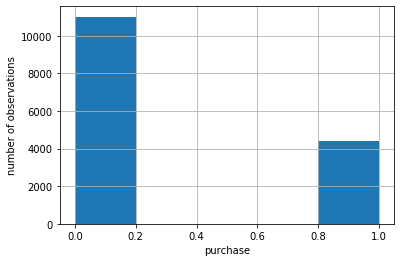

In [16]:
organic['purchase'].hist(bins=5)
xlabel('purchase')
ylabel('number of observations')


## Create Design Matrics

In [17]:
formula = ('purchase ~ 0 + C(gender) + C(region) + C(loyalty_level) + C(tvregion) + affluence + age + loyalty_tenure')

In [20]:
Y,X = dmatrices(formula, organic, return_type = 'dataframe')


In [21]:
y = Y['purchase'].values

## Plot Data

#### Purchase vs affluence 

In [22]:
purchase_vs_affluence = pd.crosstab(organic['affluence'],organic['purchase'])
purchase_vs_affluence

purchase,0,1
affluence,,
0,3,0
1,24,0
2,126,10
3,339,39
4,623,58
5,1029,136
6,1375,249
7,1501,345
8,1455,423


In [23]:
total_affluence = purchase_vs_affluence.apply(sum)
purchase_vs_affluence /= total_affluence
purchase_vs_affluence

purchase,0,1
affluence,,
0,0.000272,0.000000
1,0.002178,0.000000
2,0.011436,0.002282
3,0.030768,0.008898
4,0.056544,0.013233
5,0.093393,0.031029
6,0.124796,0.056810
7,0.136232,0.078713
8,0.132057,0.096509


In [24]:
purchase_vs_affluence[1].sort_values(ascending = False)

affluence
9     0.114762
10    0.112936
11    0.101300
8     0.096509
12    0.088524
7     0.078713
13    0.075519
14    0.060461
6     0.056810
15    0.046087
5     0.031029
16    0.030801
17    0.020534
18    0.013917
4     0.013233
19    0.012320
20    0.010723
3     0.008898
21    0.006845
22    0.004335
23    0.003422
24    0.002966
25    0.002738
2     0.002282
26    0.001141
27    0.001141
29    0.000684
31    0.000456
30    0.000456
34    0.000228
28    0.000228
1     0.000000
0     0.000000
Name: 1, dtype: float64

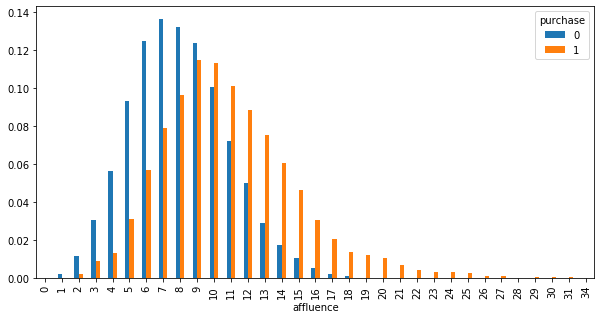

In [25]:
purchase_vs_affluence.plot(kind='bar', figsize=(10,5))

**Observations**
* affluence from 9-11 has a higher tendency to purchase organic products
* surprisingly affluence from 30-34 has a lower tendency to purchase organic products



#### purchase vs age

In [26]:
purchase_vs_age = pd.crosstab(organic['age'],organic['purchase'])
purchase_vs_age

purchase,0,1
age,,
18,4,0
19,4,0
20,2,6
21,2,4
22,6,11
...,...,...
75,162,39
76,188,37
77,163,39


In [27]:
total_age = purchase_vs_age.apply(sum)
purchase_vs_age /= total_age
purchase_vs_age

purchase,0,1
age,,
18,0.000363,0.000000
19,0.000363,0.000000
20,0.000182,0.001369
21,0.000182,0.000913
22,0.000545,0.002510
...,...,...
75,0.014703,0.008898
76,0.017063,0.008442
77,0.014794,0.008898


In [28]:
purchase_vs_age[1].sort_values(ascending = False)

age
37    0.050194
39    0.041980
35    0.039699
36    0.037874
38    0.037645
        ...   
23    0.002282
20    0.001369
21    0.000913
19    0.000000
18    0.000000
Name: 1, Length: 62, dtype: float64

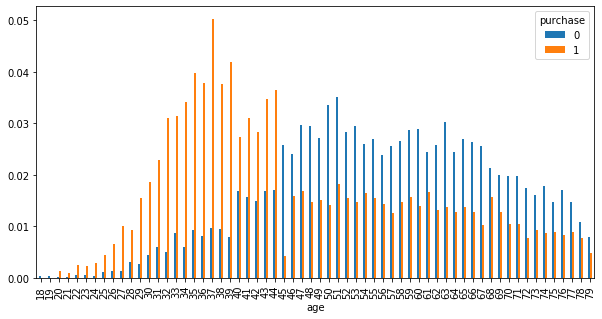

In [29]:
purchase_vs_age.plot(kind='bar', figsize=(10,5))

**Observations**
* aging group from 35-38 has a higher tendency to purchase organic products
* aging group from 18-23 has a lower tendency to purchase organic products. 

## Split the data into training and testing sets 

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Fit the Classifer

In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

/Users/hau/Anaconda3/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Calculate Training Accuracy

In [32]:
from sklearn import metrics

prediction_train = model.predict(X_train)
print(metrics.accuracy_score(y_train, prediction_train))

0.7845083487940631


## Calculate Testing Accuracy

In [33]:
from sklearn import metrics

prediction_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, prediction_test))

0.7931183726466133


**Explaination**
* The **training accuracy** and **testing accuracy** is pretty close. 
* We can confirm the **Logistics Regression Model** has the correct accuracy level

## Baseline Accuracy 

In [34]:
# y_train is 0 or 1 
print('Number of positive examples =', len(y_train[y_train == 1]))
print('Number of negative examples =', len(y_train[y_train == 0]))

Number of positive examples = 3092
Number of negative examples = 7688


**Explaination**
* **Baseline Accuracy** will always predicting **negative class**
* People will be less likely to purchase organic products

## Feature Weights

In [35]:
# Slope 
model.coef_

array([[ 0.3072977 , -0.65411672, -0.07677258, -0.04473323, -0.04550844,
         0.03276696, -0.2746435 , -0.07627505, -0.03128252, -0.00524695,
        -0.00583872, -0.03469452, -0.05558392,  0.21476416,  0.05766547,
        -0.16216707, -0.01081392,  0.03276696, -0.1406893 , -0.0104598 ,
        -0.12936966,  0.24868766, -0.05425891,  0.00233927]])

In [36]:
# Intercept 
model.intercept_

array([-0.36045996])

In [37]:
weights = Series(model.coef_[0], index = X.columns.values)
weights.sort_values()

C(gender)[M]                   -0.654117
C(loyalty_level)[T.Platinum]   -0.274643
C(tvregion)[T.N West]          -0.162167
C(tvregion)[T.Ulster]          -0.140689
C(tvregion)[T.Yorkshire]       -0.129370
C(region)[T.North]             -0.076773
C(loyalty_level)[T.Silver]     -0.076275
C(tvregion)[T.Midlands]        -0.055584
age                            -0.054259
C(region)[T.South East]        -0.045508
C(region)[T.Scottish]          -0.044733
C(tvregion)[T.London]          -0.034695
C(loyalty_level)[T.Tin]        -0.031283
C(tvregion)[T.S & S East]      -0.010814
C(tvregion)[T.Wales & West]    -0.010460
C(tvregion)[T.East]            -0.005839
C(tvregion)[T.C Scotland]      -0.005247
loyalty_tenure                  0.002339
C(region)[T.South West]         0.032767
C(tvregion)[T.S West]           0.032767
C(tvregion)[T.N Scot]           0.057665
C(tvregion)[T.N East]           0.214764
affluence                       0.248688
C(gender)[F]                    0.307298
dtype: float64

In [ ]:
**Observations**

* Male has a negative weight
    * Ma`le shoppers are less likely to purchase organic products
* Suprisingly, platinum level has a negative weight.
    * platinum level (the highest loyalty level) shopper has a less likelyhood to purchase organic products
* Female has a positive weight 
    * Female shoppers are more likely to purchase organic products
* affluence has a positive weight 
    * The more affluence customers are more likely to purchase organic products
    * However, from our observation above, only the middle class affluenc

In [ ]:
model.